# <!-- dom:TITLE: Numerical solution of the cable equation -->
# The cable equation - solved coding exercises
<!-- dom:AUTHOR: Joakim Sundnes -->
<!-- Author: -->  
**Joakim Sundnes**

Date: **Jun 18, 2018**

## Outline
* The cable equation

* The bistable equation

  * Finite difference scheme


* The FitzHugh-Nagumo model

  * Finite difference scheme

  * Simulating reentry
  
## Warning!
This notebook contains lots of duplicated code. When solving the exercises yourself it is not necessary to copy all the code cells. 

## The cable equation

The standard cable equation is a reaction-diffusion equation given by

$$
\frac{\partial v}{\partial t} = k\frac{\partial ^2}{\partial x^2} +
f(v,s) ,
$$



where $f(v,s)$ is a reaction term describing ionic fluxes across the
membrane.

* A linear $f(v)$ describes passive conduction through a leaky cable (dendrites).

* A cubic $f(v)$ gives the bistable equation with a propagating activation front.

* In general $f(v,s)$, where $s$ is a vector describing the state of the cell membrane, typically governed by a system of ODEs

## Solving the bistable equation

We want to solve the bistable equation on an interval $\Omega =[0,L]$:

$$
\begin{alignat*}{2}
v_t &= kv_{xx} + Av(1-v)(v-\alpha) & \mbox{ for } & t> 0, 0 < x < L, \\
v_x &= 0 & \mbox{ for } &x = 0, x = L, \\
v & = v_0 &\mbox{ for } &t = 0, 0 < x = < L/10, \\
v & = 0 &\mbox{ for } &t = 0, L/10< x = < L,
\end{alignat*}
$$

## Explicit finite difference scheme

We replace the derivatives with finite differences

$$
\begin{align*}
v_t &\approx \frac{v_i^{n+1}-v_i^n}{\Delta t}, \\
v_{xx} &\approx \frac{v_{i-1}^{n}-2v_i^n+v_{i+1}^n}{\Delta t}, \\
v_x &\approx \frac{v_{i+1}^{n}-v_i^n}{\Delta x}.
\end{align*}
$$

Use these relations to derive an explicit update scheme for $v$.

$$
\begin{align*}
v_i^{n+1} = (...), \\
v_0^{n+1} = v_1^{n+1}, \\
v_N^{n+1} = v_{N-1}^{n+1}.
\end{align*}
$$

## Bistable equation in Python

Use a Numpy array for the solution, and a loop over time steps

with

$$
\begin{alignat*}{2}
k &= 1.0, A &= 1.0, \alpha &= 0.1 \\
L &= 100, v0&= 0.3. & 
\end{alignat*}
$$

(Note that we have used the compact notation $v_t = \partial
v/\partial t, v_{xx} = \partial^2v/\partial x^2$.)

In [11]:
%matplotlib inline
import matplotlib.pyplot as pl
from IPython import display

import numpy as np
k = 2.0
A = 1.0
alpha = 0.1
L =100

dx = 1;
dt = 0.1;

N = int(L/dx)

v = np.zeros(N)
v_prev = v
left =  int(N/10)
v_prev[:left] = 0.3

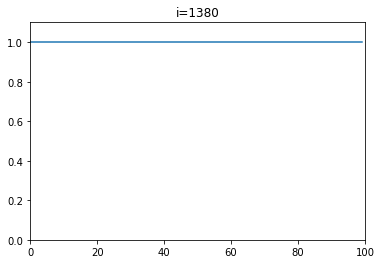

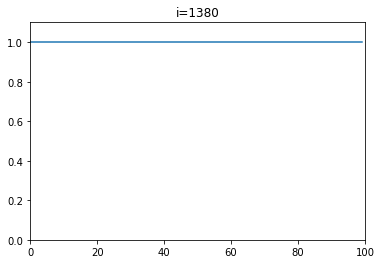

In [12]:
for i in range (1400): 
    for j in range(1,N-1):
        I_ion = A*v_prev[j]*(1-v_prev[j])*(v_prev[j]-alpha)
        v[j]  = v_prev[j] + dt*(k/dx**2)*(v_prev[j+1]-2*v_prev[j]+v_prev[j-1]) +dt*I_ion
    v[0] = v[1]
    v[N-1] = v[N-2]
    v_prev = v
    if i%20==0:  #to avoid displaying every time step
        pl.clf()
        pl.axis([0, L, 0, 1.1])
        pl.plot(v)
        pl.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(pl.gcf())

# Comments on the code
* The solution is not saved, but overwritten for every step.

* Loops in Python are slow. Can you update $v$ without looping over the spatial domain?

In [15]:
%matplotlib inline
import matplotlib.pyplot as pl
from IPython import display

import numpy as np
k = 2.0
A = 1.0
alpha = 0.1
L =100

dx = 1;
dt = 0.1;

N = int(L/dx)

v = np.zeros(N)
left =  int(N/10)
v[:left] = 0.3

#introduce the appropriate arrays for slicing:
I = np.arange(1,N-1)
Ip = I+1
Im = I-1;

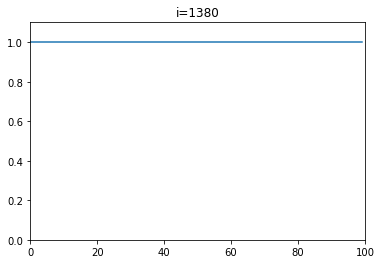

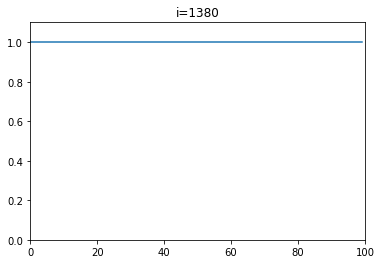

In [16]:
for i in range (1400): 
    I_ion = A*v*(1-v)*(v-alpha) 
    v[I] = v[I] + dt*(k/dx**2)*(v[Ip]-2*v[I] +v[Im])
    v = v + dt*I_ion;
    v[0] = v[1]
    v[N-1] = v[N-2]
    
    if i%20==0:  #to avoid displaying every time step
        pl.clf()
        pl.axis([0, L, 0, 1.1])
        pl.plot(v)
        pl.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(pl.gcf())

# Solving the FitzHugh-Nagumo (FHN) model
A small modification of the bistable equation gives the
FHN model:

$$
\begin{alignat*}{2}
v_t &= kv_{xx} + Av(1-v)(v-\alpha) -w & \mbox{ for } & t> 0, 0 < x < L, \\
w_t &= \epsilon (v-\gamma w) & \mbox{ for } & t> 0, 0 < x < L, \\
v_x &= 0 & \mbox{ for } &x = 0, x = L, \\
v & = v_0 &\mbox{ for } &t = 0, 0 < x = < L/10, \\
v & = 0 &\mbox{ for } &t = 0, L/10< x = < L,
\end{alignat*}
$$

The additional parameters are set to

$$
\epsilon = 0.005, \gamma = 2.0 .
$$

Extend the solver from above to solve the FHN model.

In [39]:
%matplotlib inline
import matplotlib.pyplot as pl
from IPython import display

import numpy as np
k = 2.0
A = 1.0
alpha = 0.1
L =100
eps = 0.005
gamma = 2.0

dx = 1;
dt = 0.1;

N = int(L/dx)

v = np.zeros(N);
w = np.zeros(N)
left =  int(N/10);
v[:left] = 0.3;

I = np.arange(1,N-1)
Ip = I+1
Im = I-1;

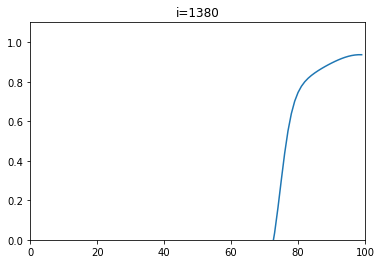

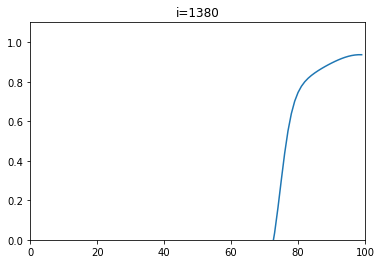

In [40]:
for i in range (1400):
    I_ion = A*v*(1-v)*(v-alpha) -w
    v[I] = v[I] + dt*(k/dx**2)*(v[Ip]-2*v[I] +v[Im])
    v = v + dt*I_ion;    
    w = w +dt*eps*(v-gamma*w)
        
    v[0] = v[1]
    v[N-1] = v[N-2]
    if i%20==0:  #to avoid displaying every time step
        pl.clf()
        pl.axis([0, L, 0, 1.1])
        pl.plot(v)
        pl.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(pl.gcf())

## Simulating reentry (1)

We can model a simple reentrant circuit with periodic boundary
conditions:

$$
v(0) = v(L)
$$

* Implement this condition in the FHN solver

* What happens? Why?

In [58]:
%matplotlib inline
import matplotlib.pyplot as pl
from IPython import display

import numpy as np
k = 2.0
A = 1.0
alpha = 0.1
L =100
eps = 0.005
gamma = 2.0

dx = 1;
dt = 0.1;

N = int(L/dx)

v = np.zeros(N);
w = np.zeros(N)
left =  int(N/10);
v[:left] = 0.3;
#mid =  int(N/2);
#v[mid-10:mid+10] = 0.3;
#w[:int(0.9*mid)] = 0.1

I = np.arange(N)
Ip = I+1
Ip[N-1] = 0
Im = I-1;
Im[0] = N-1

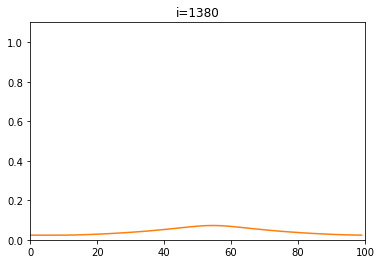

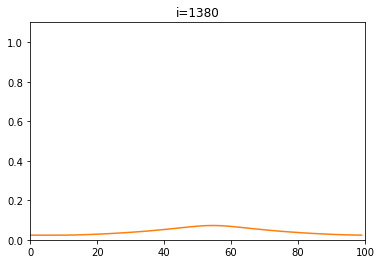

In [59]:
for i in range (1400):
    I_ion = A*v*(1-v)*(v-alpha) -w
    v[I] = v[I] + dt*(k/dx**2)*(v[Ip]-2*v[I] +v[Im])
    v = v + dt*I_ion;    
    w = w +dt*eps*(v-gamma*w)
        
    #v[0] = v[N-1]
    #v[N-1] = v[N-2]
    if i%20==0:  #to avoid displaying every time step
        pl.clf()
        pl.axis([0, L, 0, 1.1])
        pl.plot(v)
        pl.plot(w)
        pl.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(pl.gcf())

## Simulating reentry (2)
Modify the initial condition to:

In [4]:
mid = int(N/2)
V[mid-2:mid+2] = 0.3

What happens?
(See code above.)

Now, add the line

In [5]:
W[:int(0.9*mid)] = 1

What happens? 
(See code above.)
Why?
We get a unidirectional block, which sets up a reentrant circuit. The resulting wave will go on forever. 
